<a href="https://colab.research.google.com/github/HowardHNguyen/Data_Science_for_Marketing_Solutions/blob/main/House_Value_Predictions_with_Machine_Learning_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt
#from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LinearRegression
#from sklearn import metrics
%matplotlib inline

In [ ]:
#from google.colab import files
#uploaded = files.upload()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/data/housing_data.csv')

# **Explore the dataset**

In [ ]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
data.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [ ]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [ ]:
data.shape

(21613, 21)

In [ ]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [ ]:
#check the dataset with null values or not => if any null values found, we should replace it with the mean values.
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

# **Find Correlations between Variables in the dataset**

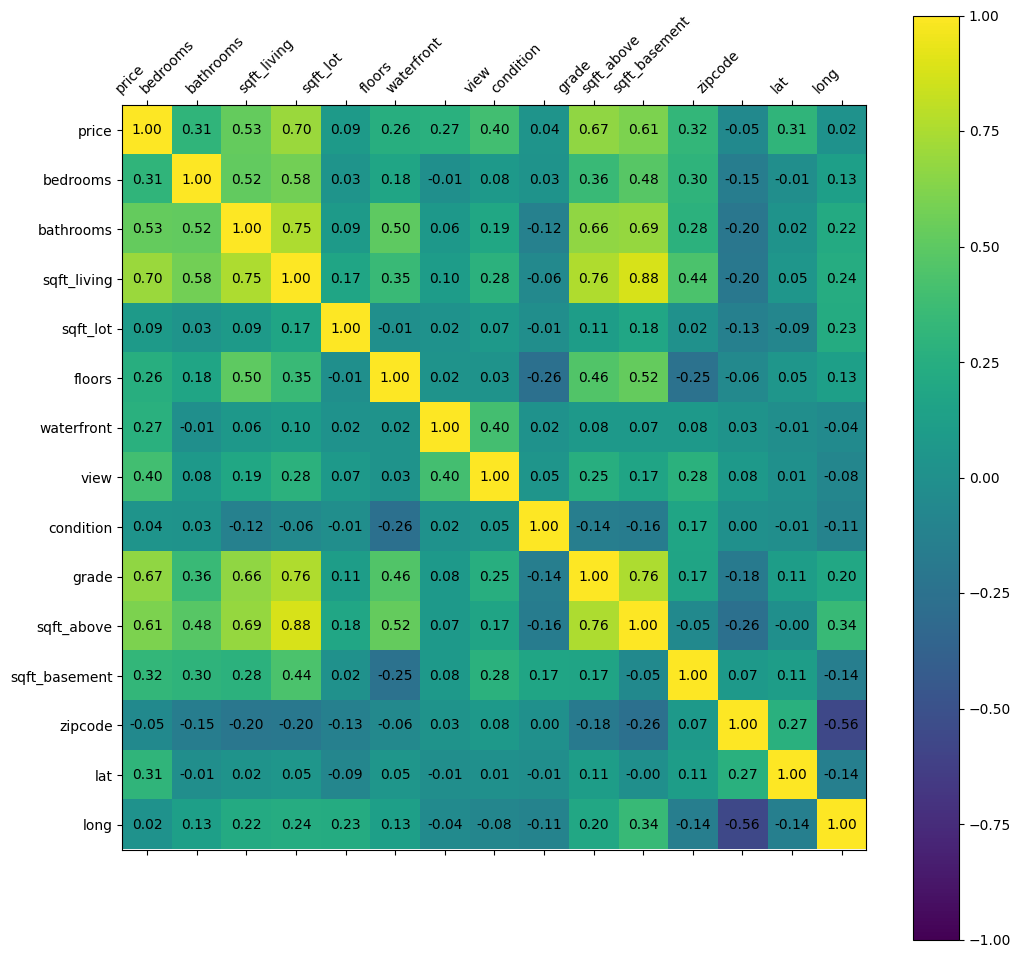

In [ ]:
# Create a heatmap to find the correlation variables
names=['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition',
       'grade','sqft_above','sqft_basement','zipcode','lat','long']
df = data[names]
correlations = df.corr()

# Set the figsize parameter when creating the figure
fig = plt.figure(figsize=(12, 12))

ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)

ticks = np.arange(0, 15, 1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names, rotation=45, ha='right')
ax.set_yticklabels(names)

# Display numerical values in the heatmap
for i in range(len(names)):
    for j in range(len(names)):
        text = ax.text(j, i, f'{correlations.iloc[i, j]:.2f}', ha='center', va='center', color='black')

plt.show()

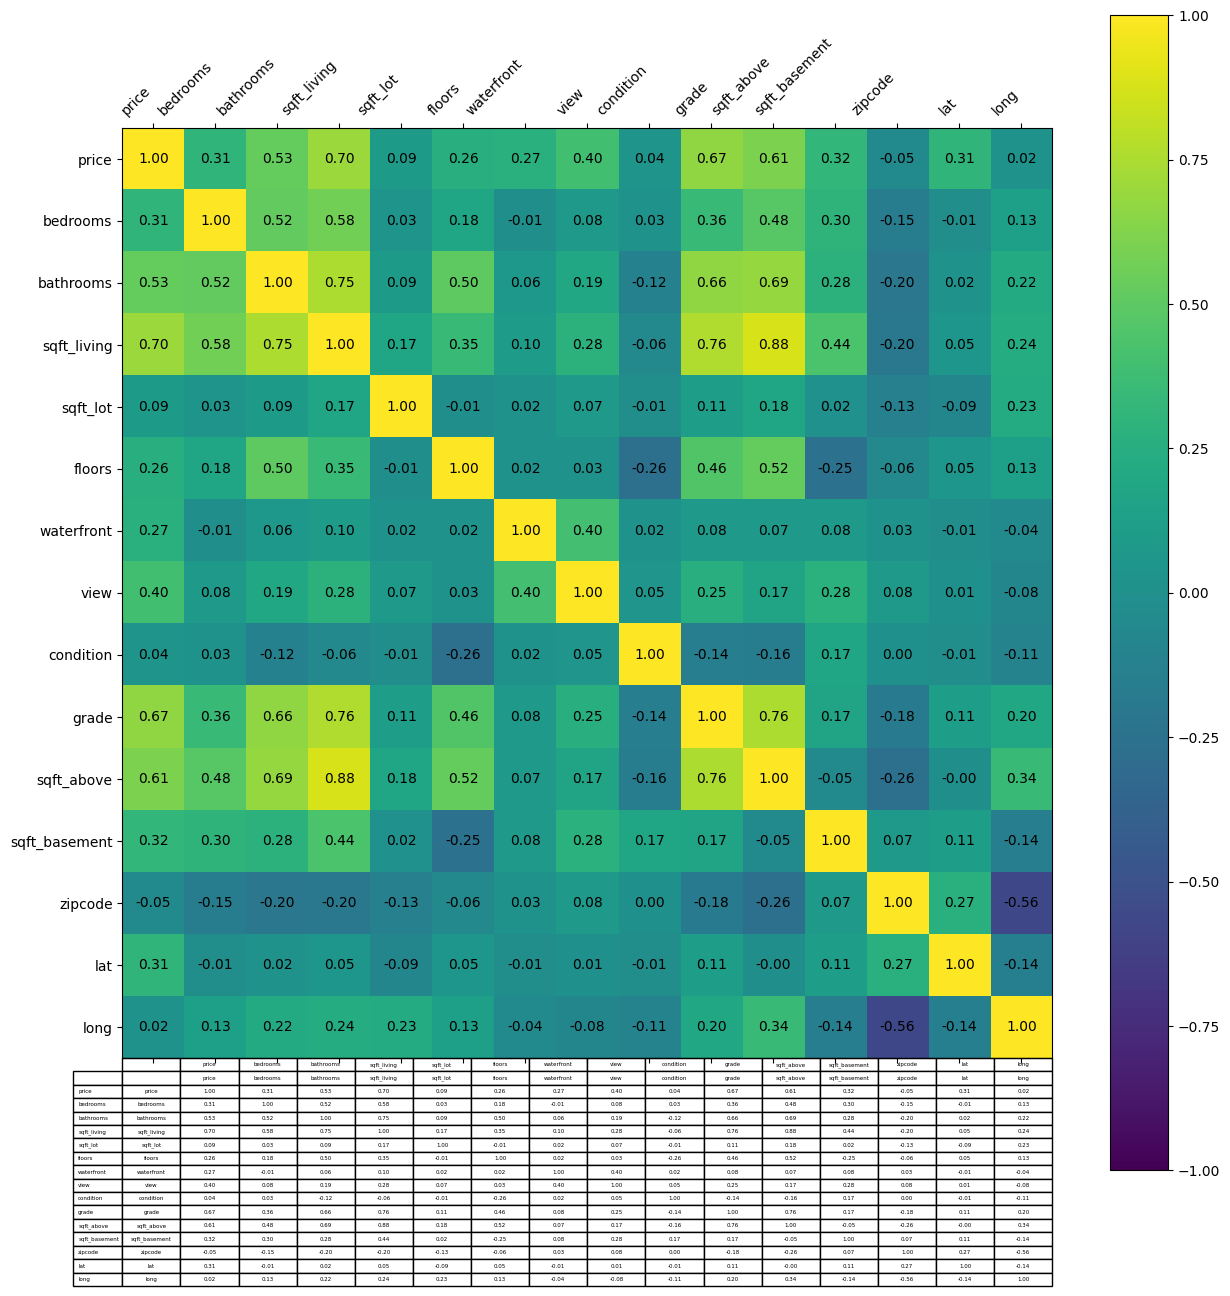

In [ ]:
# Create a heatmap to find the correlation variables
names=['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition',
       'grade','sqft_above','sqft_basement','zipcode','lat','long']
df = data[names]
correlations = df.corr()

# Set the figsize parameter when creating the figure
fig = plt.figure(figsize=(15, 15))

ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)

ticks = np.arange(0, len(names), 1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names, rotation=45, ha='right')
ax.set_yticklabels(names)

# Display numerical values in the heatmap
for i in range(len(names)):
    for j in range(len(names)):
        text = ax.text(j, i, f'{correlations.iloc[i, j]:.2f}', ha='center', va='center', color='black')

# Create a table for the correlation values
table_values = [[''] + names]
for i, name in enumerate(names):
    row_values = [name]
    for j in range(len(names)):
        row_values.append(f'{correlations.iloc[i, j]:.2f}')
    table_values.append(row_values)

# Display the table
plt.table(cellText=table_values, loc='bottom', cellLoc='center', colLabels=table_values[0], rowLabels=[''] + names)
plt.show()

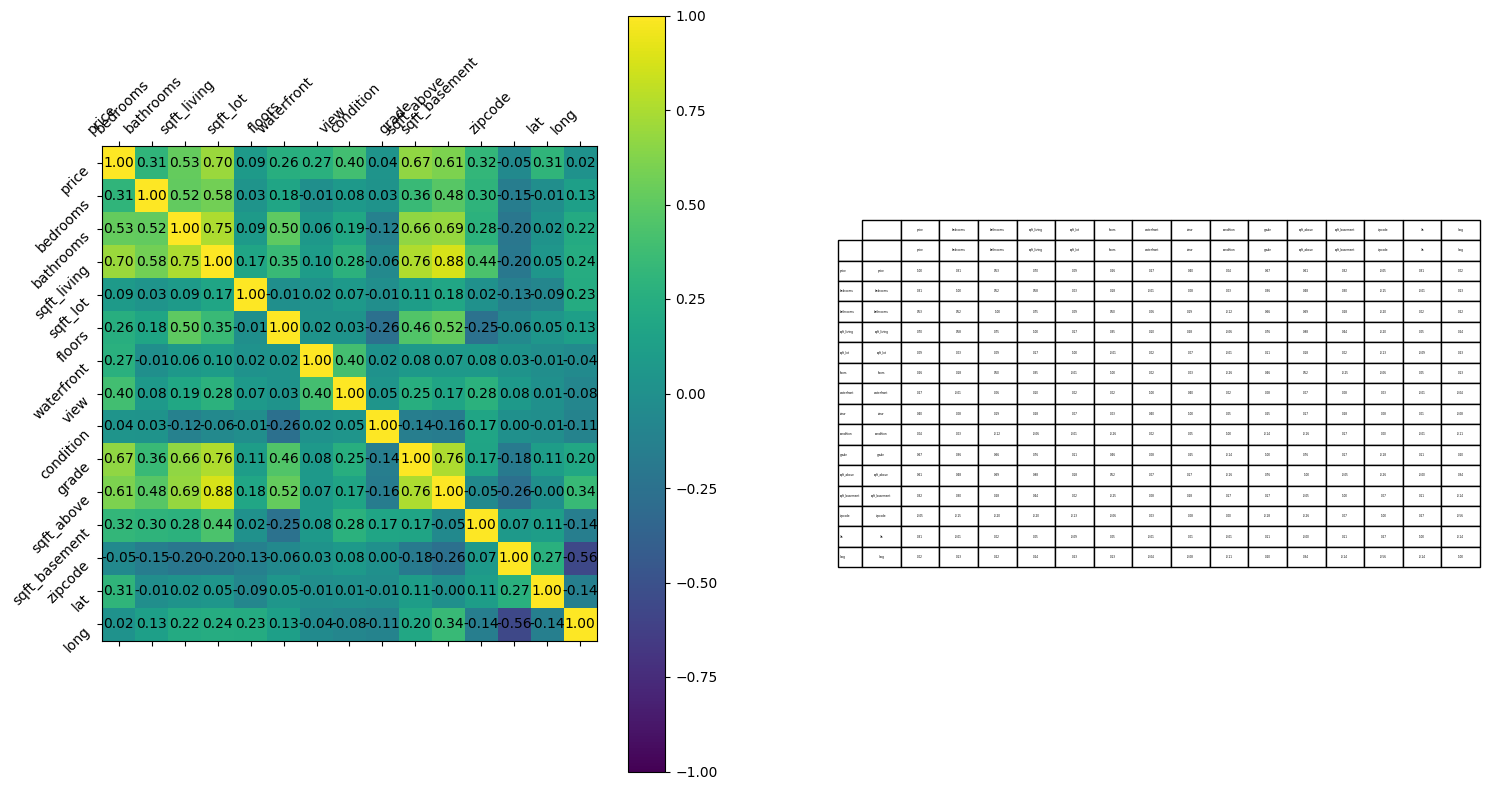

In [ ]:
# Create a heatmap to find the correlation variables
names=['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition',
       'grade','sqft_above','sqft_basement','zipcode','lat','long']
df = data[names]
correlations = df.corr()

# Set the figsize parameter when creating the figure
fig = plt.figure(figsize=(15, 8))

# Heatmap subplot
ax_heatmap = fig.add_subplot(121)
cax = ax_heatmap.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)

ticks = np.arange(0, len(names), 1)
ax_heatmap.set_xticks(ticks)
ax_heatmap.set_yticks(ticks)

# Rotate x-axis and y-axis tick labels to 45 degrees
ax_heatmap.set_xticklabels(names, rotation=45, ha='right')
ax_heatmap.set_yticklabels(names, rotation=45, va='top')

# Display numerical values in the heatmap
for i in range(len(names)):
    for j in range(len(names)):
        text = ax_heatmap.text(j, i, f'{correlations.iloc[i, j]:.2f}', ha='center', va='center', color='black')

# Table subplot
ax_table = fig.add_subplot(122)
table_values = [[''] + names]
for i, name in enumerate(names):
    row_values = [name]
    for j in range(len(names)):
        row_values.append(f'{correlations.iloc[i, j]:.2f}')
    table_values.append(row_values)

# Display the table
ax_table.table(cellText=table_values, loc='center', cellLoc='center', colLabels=table_values[0], rowLabels=[''] + names)
ax_table.axis('off')  # Turn off axis for the table subplot

plt.tight_layout()
plt.show()

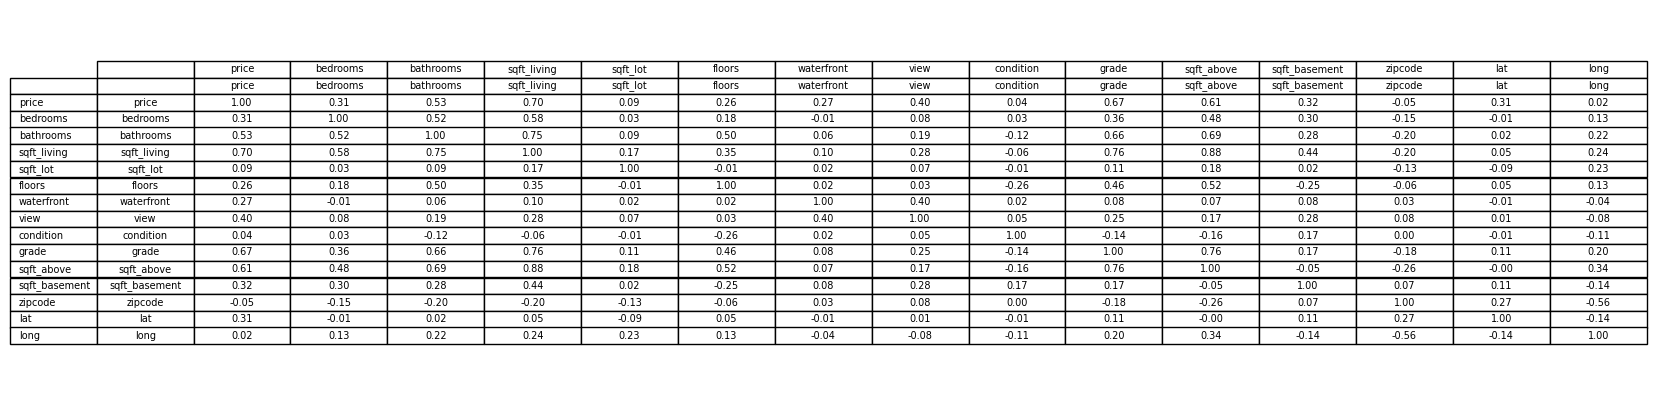

In [ ]:
# Create a table data to find the correlation variables
names=['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition',
       'grade','sqft_above','sqft_basement','zipcode','lat','long']
df = data[names]
correlations = df.corr()

# Set the figsize parameter when creating the figure
fig = plt.figure(figsize=(20, 5))

# Table subplot
ax_table = fig.add_subplot(111)
table_values = [[''] + names]
for i, name in enumerate(names):
    row_values = [name]
    for j in range(len(names)):
        row_values.append(f'{correlations.iloc[i, j]:.2f}')
    table_values.append(row_values)

# Display the table
ax_table.table(cellText=table_values, loc='center', cellLoc='center', colLabels=table_values[0], rowLabels=[''] + names)
ax_table.axis('off')  # Turn off axis for the table subplot

plt.show()

In [ ]:
# Find the top 5 variables
names=['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition',
       'grade','sqft_above','sqft_basement','zipcode','lat','long']
df = data[names]
correlations = df.corr()

# Stack the correlation matrix and sort by the values
stacked_corr = correlations.stack().reset_index()
stacked_corr.columns = ['Variable 1', 'Variable 2', 'Correlation']
sorted_corr = stacked_corr.sort_values(by='Correlation', ascending=False)

# Select the top 5 highest correlations
top5_corr = sorted_corr.head(20)

print("Top 5 Highest Correlations:")
print(top5_corr)

Top 5 Highest Correlations:
        Variable 1     Variable 2  Correlation
0            price          price     1.000000
16        bedrooms       bedrooms     1.000000
208            lat            lat     1.000000
192        zipcode        zipcode     1.000000
176  sqft_basement  sqft_basement     1.000000
160     sqft_above     sqft_above     1.000000
144          grade          grade     1.000000
128      condition      condition     1.000000
96      waterfront     waterfront     1.000000
80          floors         floors     1.000000
64        sqft_lot       sqft_lot     1.000000
48     sqft_living    sqft_living     1.000000
32       bathrooms      bathrooms     1.000000
112           view           view     1.000000
224           long           long     1.000000
55     sqft_living     sqft_above     0.876597
153     sqft_above    sqft_living     0.876597
138          grade    sqft_living     0.762704
54     sqft_living          grade     0.762704
145          grade     sqft_abov

In [ ]:
# Find the top 5 variables correlated with prices
names=['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition',
       'grade','sqft_above','sqft_basement','zipcode','lat','long']
df = data[names]
correlations = df.corr()

# Get correlations with price variable and sort by absolute values
price_correlations = correlations['price'].abs().sort_values(ascending=False)

# Select the top 5 highest correlated with price
top5_variable = price_correlations[1:6]

print("Top 5 Highest Correlated with price:")
print(top5_variable)

Top 5 Highest Correlated with price:
sqft_living    0.702035
grade          0.667434
sqft_above     0.605567
bathrooms      0.525138
view           0.397293
Name: price, dtype: float64


**Top 5 correlated variables are:**

- sqft_living
- grade
- sqft_above
- bathrooms
- view

In [ ]:
# Convert nominal and ordinal features into category.
#data['waterfront'] = pd.Categorical(data['waterfront'], ordered=True)
#data['view'] = pd.Categorical(data['view'], ordered=True)
#data['condition'] = pd.Categorical(data['condition'], ordered=True)
#data['grade'] = pd.Categorical(data['grade'], ordered=False)
#data['zipcode'] = pd.Categorical(data['zipcode'], ordered=False)

In [ ]:
data.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

# **Visualize the relationship between variable pairs**

In [ ]:
# We should remove bedroom > 10 and bathroon > 8
data = data[data['bedrooms'] < 10]
data = data[data['bedrooms'] < 8 ]

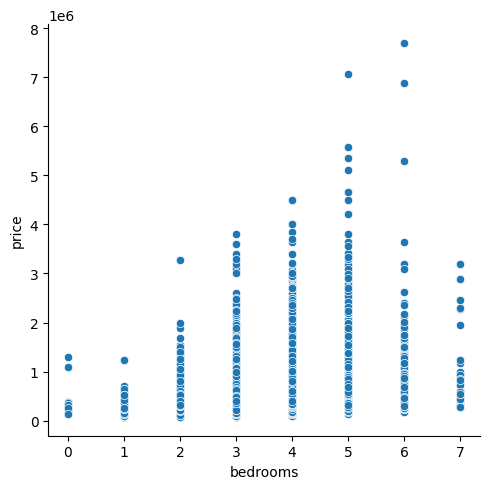

In [ ]:
sns.relplot(x='bedrooms', y='price', data=data)

<Axes: xlabel='bedrooms', ylabel='price'>

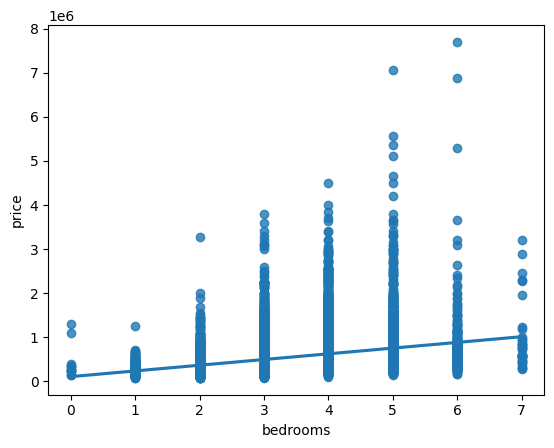

In [ ]:
sns.regplot(x='bedrooms', y='price', data=data)

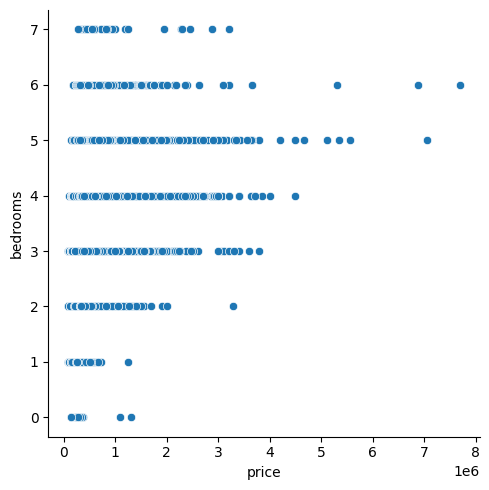

In [ ]:
sns.relplot(x='price', y='bedrooms', data=data)

<Axes: xlabel='price', ylabel='bedrooms'>

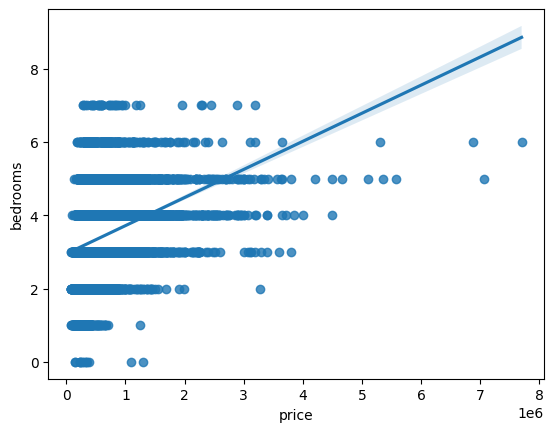

In [ ]:
sns.regplot(x='price', y='bedrooms', data=data)

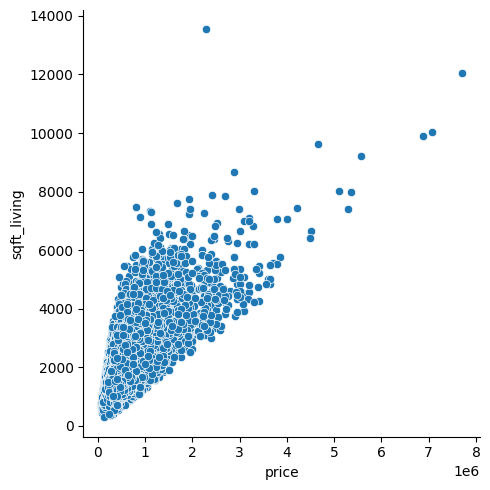

In [ ]:
sns.relplot(x='price', y='sqft_living', data=data)

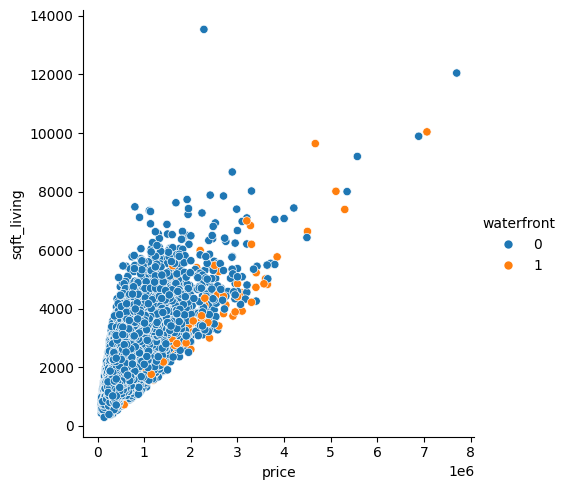

In [ ]:
sns.relplot(x='price', y='sqft_living', hue='waterfront', data=data)

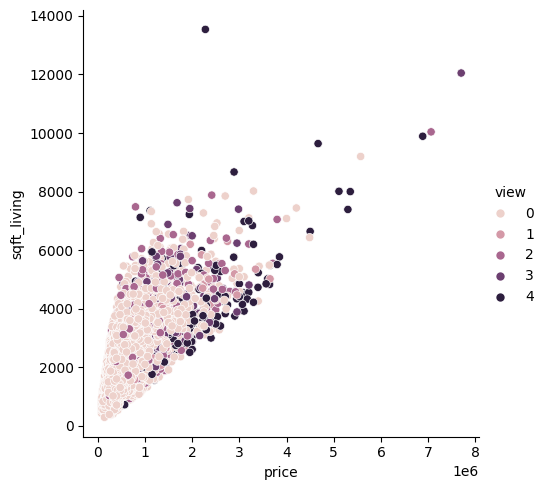

In [ ]:
sns.relplot(x='price', y='sqft_living', hue='view', data=data)

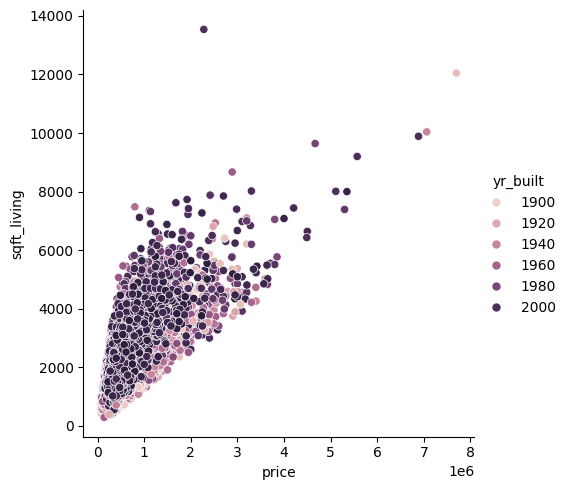

In [ ]:
sns.relplot(x='price', y='sqft_living', hue='yr_built', data=data)

In [ ]:
#sns.regplot(x='price', y='sqft_living', data=data)

<Axes: xlabel='bedrooms', ylabel='price'>

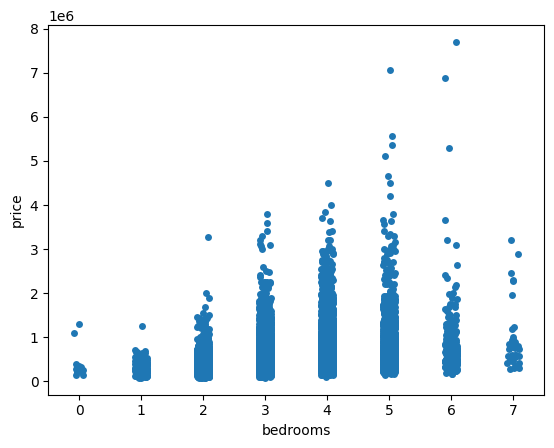

In [ ]:
sns.stripplot(x='bedrooms', y='price', data=data)

<Axes: xlabel='bedrooms', ylabel='price'>

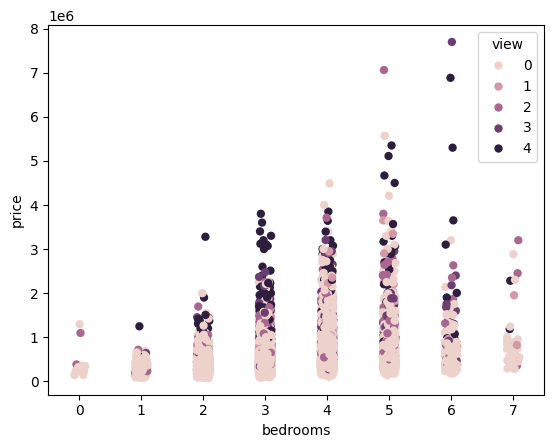

In [ ]:
sns.stripplot(x='bedrooms', y='price', hue='view', data=data, size=6)

<Axes: xlabel='grade', ylabel='price'>

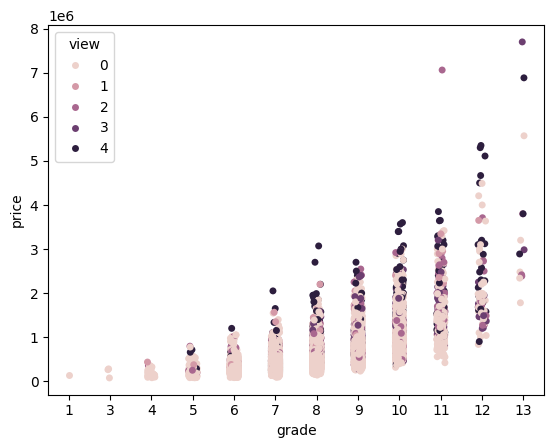

In [ ]:
sns.stripplot(x='grade', y='price', hue='view', data=data, size=5, jitter=True)

As the above plots, the price of the houses are dependent on grade of the house, higher grade => higher price.

In [ ]:
# Trim the dataset
#data = data[data['bedrooms'] < 10]
#data = data[data['bathrooms'] < 8]

In [ ]:
#model
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# **Machine Learning Models**

# Linear Regression Model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
X = ['sqft_living','grade', 'sqft_above', 'bathrooms', 'view']
df = data[X]

In [ ]:
#df = pd.get_dummies(df, columns=['grade'], drop_first=True)

In [ ]:
y = data['price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)

In [ ]:
# Create and train the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Make predictions
y_pred = lr_model.predict(X_test)

In [ ]:
# Evaluate the model
lr_mse = mean_squared_error(y_test, y_pred)
lr_mae = mean_absolute_error(y_test, y_pred)
print('Linear Regression Mean Squared Error: ', lr_mse)
print('Linear Regression Mean Absolute Error: ', lr_mae)

Linear Regression Mean Squared Error:  53546734573.87789
Linear Regression Mean Absolute Error:  154318.01122224203


# Decision Trees and Random Forests Models

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# Decision Tree
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
# Random Forest
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
# Make predictions
y_pred_dt = dt_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

In [ ]:
# Evaluate the models
mse_dt = mean_squared_error(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
print('Decision Tree Mean Squared Error: ', mse_dt)
print('Decision Tree Mean Absolute Error: ', mae_dt)

Decision Tree Mean Squared Error:  81120951459.6954
Decision Tree Mean Absolute Error:  181776.01344313583


# XGBoost Model

In [ ]:
from xgboost import XGBRegressor

In [ ]:
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

In [ ]:
# Evaluate the model
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
print('XGBoost Mean Squared Error: ', mse_xgb)
print('XGBoost Mean Absolute Error: ', mae_xgb)

XGBoost Mean Squared Error:  55752421700.38517
XGBoost Mean Absolute Error:  147180.7259075382


# Support Vector Machines (SVM) Model

In [ ]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

In [ ]:
# Scale the features for SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Create and train the model
svm_model = SVR()
svm_model.fit(X_train_scaled, y_train)

SVR()

In [ ]:
# Make predictions
y_pred_svm = svm_model.predict(X_test_scaled)

In [ ]:
# Evaluate the model
mse_svm = mean_squared_error(y_test, y_pred_svm)
mae_svm = mean_absolute_error(y_test, y_pred_svm)
print(f'SVM Mean Squared Error: {mse_svm}')
print(f'SVM Mean Absolute Error: {mae_svm}')

SVM Mean Squared Error: 138416402940.29684
SVM Mean Absolute Error: 225096.52200770777


# Neural Networks (using TensorFlow/Keras) Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
# Create a simple neural network
nn_model = Sequential()
nn_model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
nn_model.add(Dense(1, activation='linear'))
# nn_model.compile(loss='mean_squared_error', optimizer='John')

In [ ]:
# Compile the model
nn_model.compile(loss='mean_squared_error', optimizer='Adam')

In [ ]:
# Train the model
nn_model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0, validation_data=(X_test, y_test))

In [ ]:
# Make predictions
y_pred_nn = nn_model.predict(X_test)

135/135 [==============================] - 0s 1ms/step


In [ ]:
# Evalutate the model
mse_nn = mean_squared_error(y_test, y_pred_nn)
mae_nn = mean_absolute_error(y_test, y_pred_nn)
print(f'Neural Network Mean Squared Error: {mse_nn}')
print(f'Neural Network Mean Absolute Error: {mae_nn}')

Neural Network Mean Squared Error: 64777975524.557625
Neural Network Mean Absolute Error: 169110.74916410955


# **Define and Find the best model**

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler

In [ ]:
# Display MSE for each model
print(f"Linear Regression MSE: {lr_mse}")
print(f"Random Forest MSE: {mse_dt}")
print(f"XGBoost MSE: {mse_xgb}")
print(f"SVM MSE: {mse_svm}")
print(f"Neural Network MSE: {mse_nn}")

Linear Regression MSE: 53546734573.87789
Random Forest MSE: 81120951459.6954
XGBoost MSE: 55752421700.38517
SVM MSE: 138416402940.29684
Neural Network MSE: 64777975524.557625


In [ ]:
# Select the model with the lowest MSE
best_model = min([(lr_mse, 'Linear Regression'), (mse_dt, 'Random Forest'), (mse_xgb, 'XGBoost'), (mse_svm, 'SVM'), (mse_nn, 'Neural Network')], key=lambda x: x[0])
print(f"The best model is {best_model[1]} with an MSE of {best_model[0]}")

The best model is Linear Regression with an MSE of 53546734573.87789


In [ ]:
lr_model.score(X_test, y_test)

0.5885000366324067

In [ ]:
rf_model.score(X_test, y_test)

0.5704190400534228

In [ ]:
xgb_model.score(X_test, y_test)

0.571549606713924

In [ ]:
svm_model.score(X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(


-0.06656582239209863

In [ ]:
evaluation_result = nn_model.evaluate(X_test, y_test)
print(evaluation_result)

135/135 [==============================] - 0s 2ms/step - loss: 64777994240.0000
64777994240.0


**# Conclusion:**

Based on MSE evaluation, Linear Regression is performing relatively well compared to the other models you've evaluated.

Based on R-squared values, Linear Regression is also the best performer among the models we've evaluated.


*Other Evaluation*
# Create a model with top 5 variables

In [ ]:
# c = ['sqft_living','grade', 'sqft_above', 'bathrooms', 'view']
# df = data[c]

In [ ]:
# df = pd.get_dummies(df, columns=['grade'], drop_first=True)

In [ ]:
# y = data['price']

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=32)

In [ ]:
#X_train.head()

In [ ]:
#regr = LinearRegression()

In [ ]:
# regr.fit(X_train, y_train)

In [ ]:
# print(regr.intercept_)

In [ ]:
# print('Coefficients: \n', regr.coef_)

In [ ]:
# print(metrics.mean_squared_error(y_test, regr.predict(X_test)))

In [ ]:
# print(metrics.mean_absolute_error(y_test, regr.predict(X_test)))

In [ ]:
#fitting the model before predict the model
# regr.fit(X_train, y_train)

In [ ]:
# pred = regr.predict(X_test)

In [ ]:
# pred

In [ ]:
# regr.score(X_test, y_test)

# Predict a sample record

In [ ]:
X_train.head()

,sqft_living,grade,sqft_above,bathrooms,view
8990,1270,7,1270,1.75,0
10103,1946,7,1946,3.25,1
10160,1140,7,1140,2.00,0
7955,1810,7,1080,2.25,0
13242,1240,7,1060,1.00,1


In [ ]:
# Select a row
row_index = 8990  # the desired row index
selected_row = X_train.iloc[row_index, :]

# 'selected_row' is now a pandas Series representing the features of a specific row
# We can use it directly or convert it to a DataFrame if needed
X_new = pd.DataFrame([selected_row])

In [ ]:
# Display the selected row
print("Selected Row:")
print(selected_row)

Selected Row:
sqft_living    1480.00
grade             8.00
sqft_above     1000.00
bathrooms         1.75
view              0.00
Name: 11026, dtype: float64


# Or we can add any variable's values for the record to predict the house price

In [ ]:
# Sample new data with the same features
new_data = {
    'bedrooms': 3,
    'bathrooms': 2,
    'sqft_living': 1500,
    'sqft_above': 5000,
    'grade_3': 0,
    'grade_4': 0,
    'grade_5': 0,
    'grade_6': 0,
    'grade_7': 0,
    'grade_8': 0,
    'grade_9': 0,
    'grade_10': 0,
    'grade_11': 0,
    'grade_12': 0,
    'grade_13': 1
}

# Create a DataFrame for the new data
#X_new = pd.DataFrame([new_data])

In [ ]:
# Make predictions with Linear Regression model
predictions = xgb_model.predict(X_new)
print("Predicted House Prices:")
print(predictions)

Predicted House Prices:
[487616.16]


# Add Predicted prices back to the dataset

In [ ]:
X_train['predicted_price'] = lr_model.predict(X_train)

In [ ]:
# Display the updated X_train dataset with predicted prices
print("Updated X_train dataset with Predicted Prices:")
print(X_train)

Updated X_train dataset with Predicted Prices:
       sqft_living  grade  sqft_above  bathrooms  view  predicted_price
8990          1270      7        1270       1.75     0    311657.752008
10103         1946      7        1946       3.25     1    477057.315480
10160         1140      7        1140       2.00     0    282477.303284
7955          1810      7        1080       2.25     0    419640.830927
13242         1240      7        1060       1.00     1    429355.148693
...            ...    ...         ...        ...   ...              ...
11976         2230      7        2230       2.50     0    452892.512283
21599         3990      9        3990       3.00     0    940373.949408
5395          1530      6        1530       1.50     0    261105.745558
860            380      5         380       0.75     0    -14089.880310
15812         1400      7        1300       2.25     0    323603.202403

[17271 rows x 6 columns]


In [ ]:
# 'data' is our original dataset
# 'lr_model' is our trained Linear Regression model
# 'X_train' is the feature set used during training

# Create the grade-related features in the original dataset
for grade in range(1, 5):
    data[f'grade_{grade}'] = 0  # Initialize the new columns with zeros

# Select the relevant features from the original dataset
selected_features = ['view', 'bathrooms', 'sqft_living', 'sqft_above', 'grade']

# Make predictions on the original dataset
predicted_prices = lr_model.predict(data[selected_features])

# Add predicted prices to the dataset
data['predicted_prices'] = predicted_prices

# Display the updated dataset with predicted prices
print("Updated dataset with Predicted Prices:")
print(data)


ValueError: The feature names should match those that were passed during fit.
Feature names must be in the same order as they were in fit.


In [ ]:
# Select the desired columns
selected_columns = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'price', 'predicted_prices']

# Create a new DataFrame with the selected columns
new_df = data.loc[:, selected_columns]

# Display the new DataFrame
print("New DataFrame:")
print(new_df)

KeyError: "['predicted_prices'] not in index"

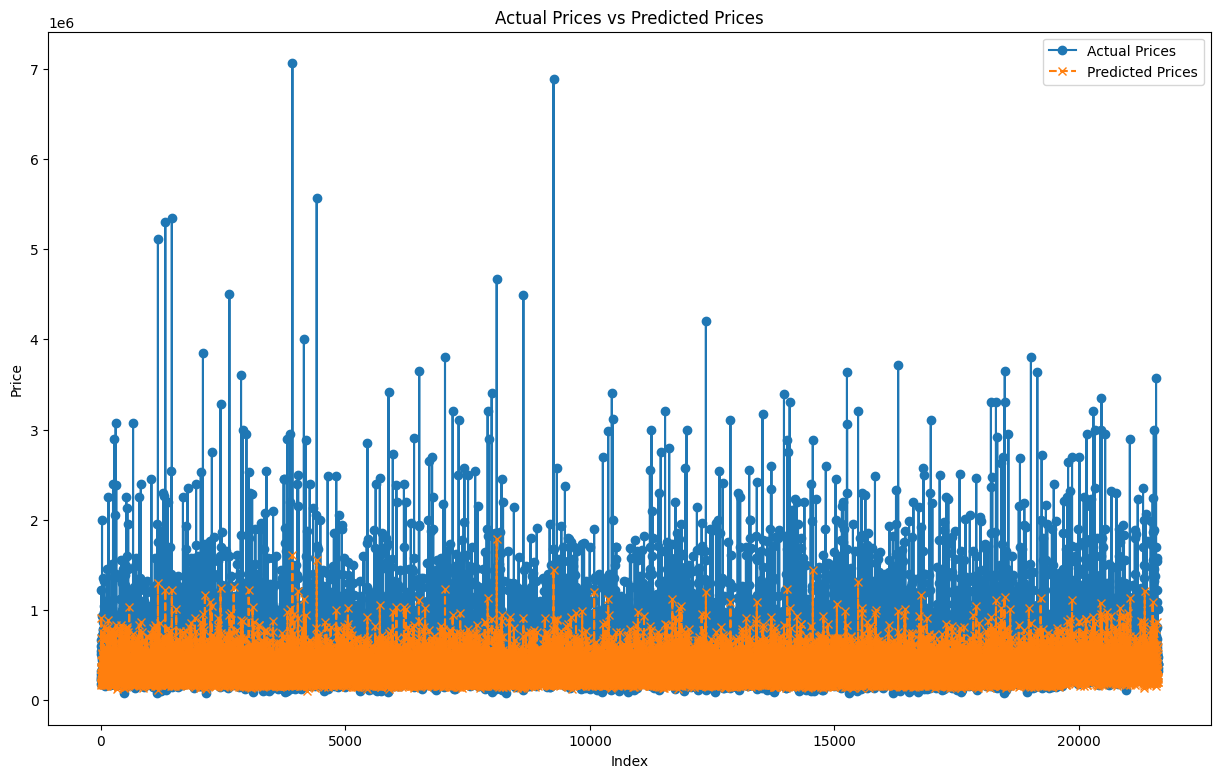

In [ ]:
# Plotting
plt.figure(figsize=(15, 9))
plt.plot(new_df['price'], label='Actual Prices', marker='o')
plt.plot(new_df['predicted_prices'], label='Predicted Prices', linestyle='--', marker='x')

# Adding labels and title
plt.xlabel('Index')
plt.ylabel('Price')
plt.title('Actual Prices vs Predicted Prices')
plt.legend()

# Show the plot
plt.show()